# Data Mining/Machine Learning Project: Medical Appointments - No Show

## Goals
1. Given a set of attributes/factors, predict if a person will miss their appointment or not.
2. Determine what factors contribute the most to a person missing their appointment.
3. Compare the performance of the 2 data mining/analysis methods implemented for this project.

##I. Business Understanding

Missed appointments are costly on the medical institutions. Therefore, understanding the factors that cause no-shows are vital in the search for potential solutions to these problems. Having the information about the data set have the following benefits:

1. Hospital can intelligently send more reminders to patients at a higher risk of missing appointments.
2. Understand if the reminder methods (in this case: SMS) are effective or not, and make changes as necessary to the strategies.
3. Inform appointment management/scheduling strategy. (More on the day or more routine appointments?)

## II. Data Understanding
### Dataset:
The dataset contains information about medical appointments and has 14 variables (PatientId, AppointmentID, Gender, DateScheduled, AppointmentDate, Age, Neighborhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMSReceived, NoShow).

### Tasks:

Explore the dataset to understand its structure, size, and features.
Check for missing values, outliers, and data types.
Understand the distribution of the target variable (NoShow).
Explore and analyze the relationships between features and the target variable.

In [1]:
# Load the required libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('fivethirtyeight')
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a pandas dataframe
df = pd.read_csv('dataset.csv')


## Data Size, Dimensionality, Size, Data types
The dataset provided by [source] has a 110527 x 14 (mxn) dimensionality. We can identify the following columns and their data types (as nominal, ordinal, or continuous):
1. PatientId: nominal
2. AppointmentID: nominal
3. Gender: nominal
4. ScheduledDay: date type
5. AppointmentDay: date type
6. Age: continuous
7. Neighbourhood: nominal
8. Scholarship: nominal
9. Hypertension: nominal
10. Diabetes: nominal
11. Alcoholism: nominal
12. Handcap: nominal
13. SMS_received: nominal
14. No-show: nominal

In [3]:
# Dataset shape
df.shape

(110527, 14)

In [4]:
# First 5 rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset has 14 columns or characteristics.

In [5]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
# List columns in the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'], dtype='object')

In [7]:
# Duplication check
df.duplicated().sum()

0

## Dataframe overall information
The dataset has no missing values across all rows and columns.

In [8]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:

df.drop(columns=['AppointmentID'], inplace=True, axis=1)
df.drop_duplicates(['PatientId','No-show'], inplace = True)
df.reset_index(drop=True, inplace=True)
df.shape

(71817, 13)

In [10]:
## rename columns to fix typos and use pythonic naming conventions
column_rename_dict = {}
for column in df.columns:
    column_rename_dict[column] = column.lower().replace(' ', '_')
    if '-' in column_rename_dict[column]:
        column_rename_dict[column] = column_rename_dict[column].replace('-', '_')

column_rename_dict['Hipertension'] = 'hypertension'
column_rename_dict['Handcap'] = 'handicap'
column_rename_dict['AppointmentDay'] = 'appointment_day'
column_rename_dict['ScheduledDay'] = 'scheduled_day'
column_rename_dict['PatientId'] = 'patient_id'

df.rename(columns=column_rename_dict, inplace=True)
# Check
df.columns


Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'], dtype='object')

## Descriptive Statistics
1. Minimum age is -1 which is not possible.
2. Scholarship, Hypertension, Diabetes are binary for all rows. But Handicap has a max value of 4. This could mean this attribute should be binary and these >1 values are errors or it means the number of handicaps the patient had. The description provided from the source via Kaggle states it should be represented as True or False, but the Discussions revealed the attribute is the number of handicaps the patient has.

In [11]:
df[df.select_dtypes(exclude='object').columns.drop(["patient_id"])].describe().T

,count,mean,std,min,25%,50%,75%,max
age,71817.0,36.526978,23.378518,-1.0,17.0,36.0,55.0,115.0
scholarship,71817.0,0.095534,0.293954,0.0,0.0,0.0,0.0,1.0
hypertension,71817.0,0.195065,0.396254,0.0,0.0,0.0,0.0,1.0
diabetes,71817.0,0.070958,0.256757,0.0,0.0,0.0,0.0,1.0
alcoholism,71817.0,0.025036,0.156235,0.0,0.0,0.0,0.0,1.0
handicap,71817.0,0.020135,0.155337,0.0,0.0,0.0,0.0,4.0
sms_received,71817.0,0.335561,0.472190,0.0,0.0,0.0,1.0,1.0


In [12]:
num_cols_no_age = df.select_dtypes(exclude='object').columns.drop(['patient_id', 'age'])

# Concatenate the percentage distribution data for all columns
perc_dist = pd.concat([pd.DataFrame({f"{column} value": df[column].value_counts(normalize=True).index,
                                                f"{column} percentage %": (df[column].value_counts(normalize=True) * 100).round(4).values})
                                  for column in num_cols_no_age], axis=1)
perc_dist = perc_dist.fillna(0)

perc_dist

,scholarship value,scholarship percentage %,hypertension value,hypertension percentage %,diabetes value,diabetes percentage %,alcoholism value,alcoholism percentage %,handicap value,handicap percentage %,sms_received value,sms_received percentage %
0,0.0,90.4466,0.0,80.4935,0.0,92.9042,0.0,97.4964,0,98.1829,0.0,66.4439
1,1.0,9.5534,1.0,19.5065,1.0,7.0958,1.0,2.5036,1,1.6403,1.0,33.5561
2,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,2,0.1615,0.0,0.0000
3,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,3,0.0111,0.0,0.0000
4,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,4,0.0042,0.0,0.0000


## Data Cleaning
The goal is to remove anomalies from the data to develop data quality. Since in the descriptive statistics check an anomaly was observed in both the age and handicap columns, data cleaning operation can be performed in these columns. We can also ensure date type columns are converted correctly to datetime.
### Steps:
1. Remove the row will the age = -1. Manual removal is done here as it is simply 1 record with this issue and will not significantly impact the age column in correlation to the target variable for data modeling.
2. Convert scheduled_day and appointment_day columns to datetime.


In [13]:
# Remove rows with negative age
df.query("age == -1")

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
67113,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Check if there are enough rows in the dataset for ROMÃO. If that's the case, the loss is negligible.

In [14]:
df[df['neighbourhood'] ==  "ROMÃO"].value_counts()

patient_id    gender  scheduled_day         appointment_day       age  neighbourhood  scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  no_show
9.951243e+07  M       2016-05-13T09:12:35Z  2016-05-13T00:00:00Z  25   ROMÃO          0            0             0         0           0         0             No         1
7.314367e+13  M       2016-05-25T10:06:43Z  2016-05-25T00:00:00Z  57   ROMÃO          0            1             0         0           0         0             No         1
7.632843e+13  F       2016-05-05T12:17:52Z  2016-05-05T00:00:00Z  33   ROMÃO          1            0             0         0           0         0             No         1
7.589239e+13  F       2016-05-18T09:43:41Z  2016-05-18T00:00:00Z  2    ROMÃO          0            0             0         0           0         0             No         1
                      2016-05-16T09:30:57Z  2016-05-24T00:00:00Z  2    ROMÃO          0            0             0         0           0         

In [15]:
# Drop row with negative age
from matplotlib import axis



df.drop(df[df['age']< 0].index, inplace = True)
df.reset_index(drop=True, inplace=True)
print(df.tail())
df.shape

         patient_id gender         scheduled_day       appointment_day  age neighbourhood  scholarship  hypertension  diabetes  alcoholism  handicap  sms_received no_show
71811  7.263315e+13      F  2016-04-27T15:15:06Z  2016-06-07T00:00:00Z   50   MARIA ORTIZ            0             0         0           0         0             1      No
71812  9.969977e+14      F  2016-05-03T07:51:47Z  2016-06-07T00:00:00Z   42   MARIA ORTIZ            0             0         0           0         0             1      No
71813  3.635534e+13      F  2016-05-03T08:23:40Z  2016-06-07T00:00:00Z   53   MARIA ORTIZ            0             0         0           0         0             1      No
71814  2.572134e+12      F  2016-05-03T09:15:35Z  2016-06-07T00:00:00Z   56   MARIA ORTIZ            0             0         0           0         0             1      No
71815  1.557663e+13      F  2016-04-27T16:03:52Z  2016-06-07T00:00:00Z   21   MARIA ORTIZ            0             0         0           0       

(71816, 13)

In [16]:
# Convert the scheduled_day and appointment_day columns to datetime
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [17]:
nominal_columns = df.select_dtypes(include='object').columns
numerical_columns =df.select_dtypes(exclude='object').columns

nominal_cols_list = nominal_columns.tolist()
num_cols_list = numerical_columns.tolist()
numerical_columns

Index(['patient_id', 'scheduled_day', 'appointment_day', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received'], dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'scholarship'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'alcoholism'}>,
        <Axes: title={'center': 'handicap'}>],
       [<Axes: title={'center': 'sms_received'}>, <Axes: >, <Axes: >]],
      dtype=object)

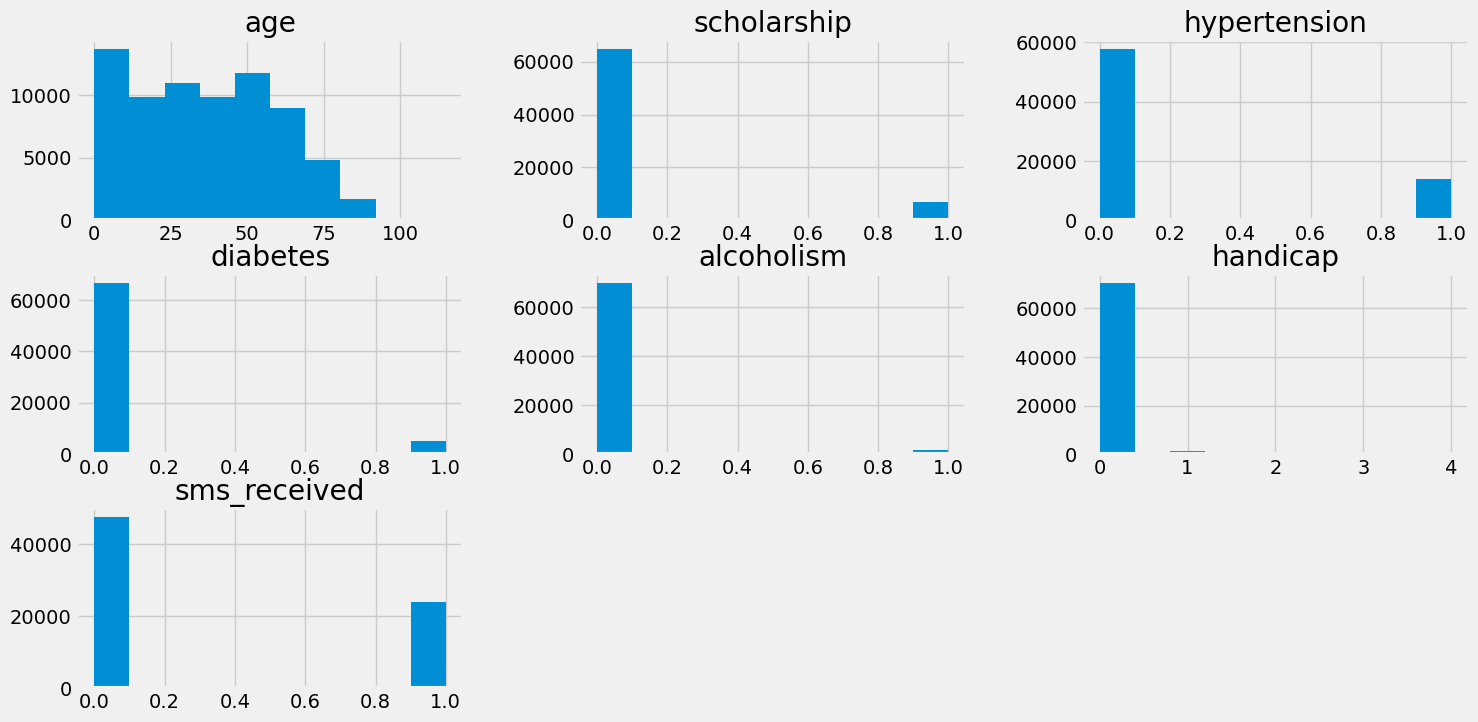

In [18]:
df[df.columns.drop(['patient_id', 'appointment_day', 'scheduled_day'])].hist(figsize=(16,8))

## Age Group Distribution
From plotting age distribution on a bar chart, baby (0 years) patients have the most frequency. The distribution is slightly left skewed meaning only a minority sample of the patient population in the dataframe were of the senior/elderly population.

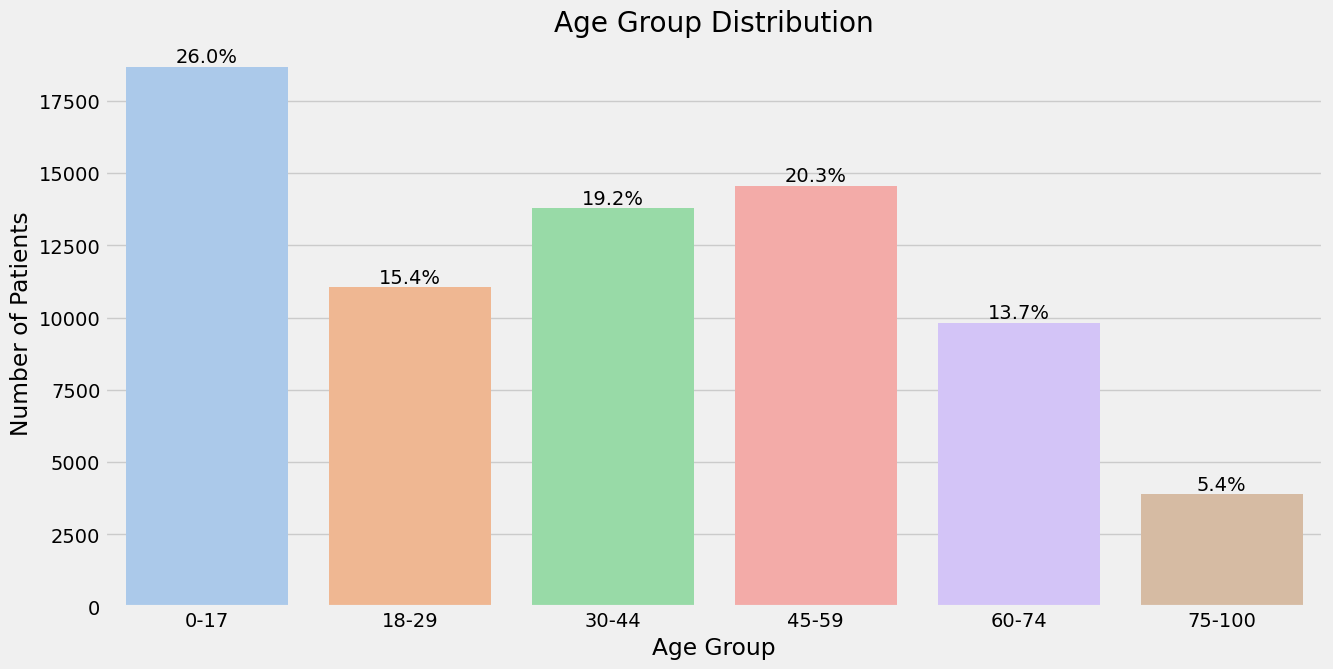

In [19]:
# Discretize the Age column into bins
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75-100']
age_group_df = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate age group counts and percentages
age_group_counts = age_group_df.value_counts().sort_index()
age_group_percentages = (age_group_counts / age_group_counts.sum()) * 100

# Prepare the data for plotting
plot_data = pd.DataFrame({'AgeGroup': age_group_counts.index, 'Count': age_group_counts.values, 'Percentage': age_group_percentages.values})

# Plot the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=plot_data, x='AgeGroup', y='Count', palette='pastel', hue='AgeGroup', dodge=False)
plt.legend([],[], frameon=False)  # Hide the legend

# Add percentages on top of bars
for i, (count, percentage) in enumerate(zip(plot_data['Count'], plot_data['Percentage'])):
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()

In [20]:
show = df['no_show'] == 'No'
no_show = df['no_show'] == 'Yes'

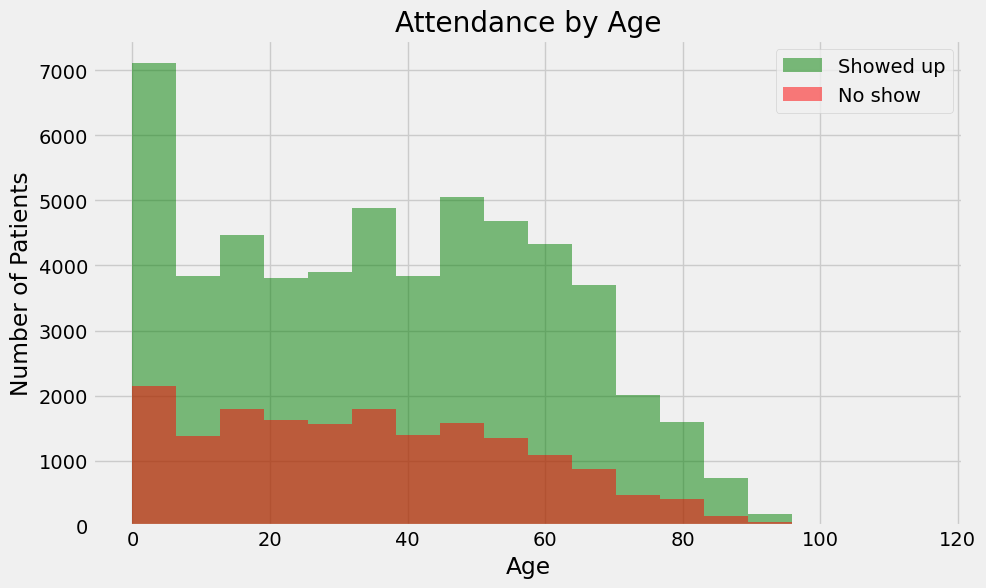

In [21]:
# Plot histograms for age based on attendance
plt.figure(figsize=(10, 6))

# Histogram for age of patients who showed up
plt.hist(df['age'][show], bins=18, color='green', alpha=0.5,  label='Showed up')
# Histogram for age of patients who didn't show up
plt.hist(df['age'][no_show], bins=18, alpha=0.5, color='red', label='No show')

plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Attendance by Age')
plt.legend()

plt.show()

## Comparison of attendance between genders (Male and Female)

The analysis shows that 64.9% of females attended their appointments versus 35.1% of males, and 65.39% of females did not attend versus 34.61% of males. This indicates that while the dataset is skewed towards females, gender here is not a strong predictor of no-show behavior due to the similar percentage distributions across both attendance and no-shows. Consequently, to achieve the project's aim of improving attendance rates, it is crucial to explore other variables such as age, medical conditions, and the impact of SMS reminders, which may provide stronger correlations and insights into patient attendance patterns.

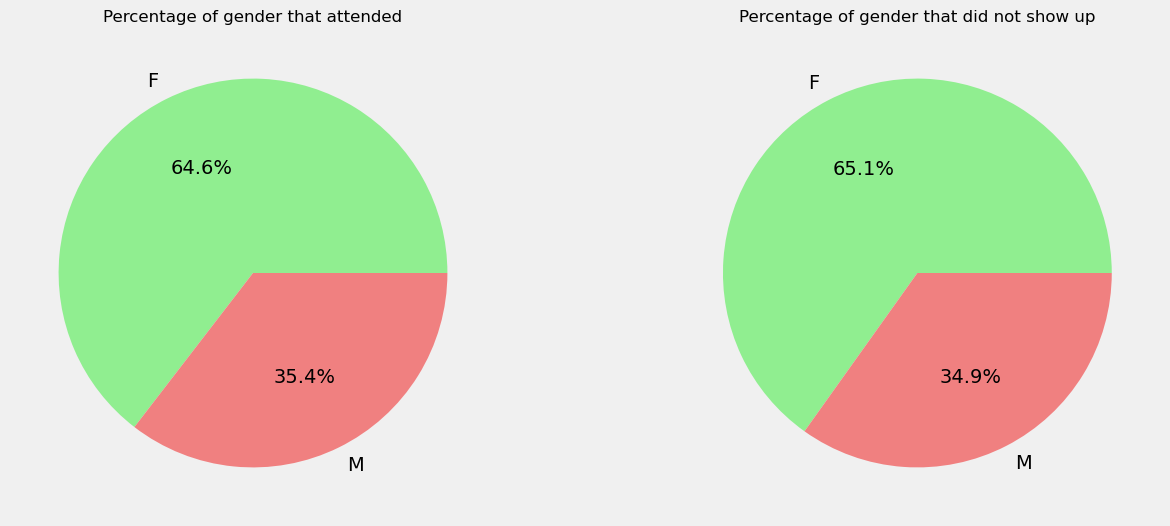

In [22]:



gender_showed = df[show]['gender'].value_counts(normalize=True)
gender_no_show = df[no_show]["gender"].value_counts(normalize=True)

colors = ['lightgreen', 'lightcoral']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
gender_showed.plot(kind='pie', autopct='%1.1f%%',ax=axes[0], colors=colors)        
axes[0].set_title('Percentage of gender that attended', fontdict={'fontsize':12})
axes[0].set_ylabel('')

gender_no_show.plot(kind='pie', autopct='%1.1f%%',ax=axes[1], colors=colors) 
axes[1].set_title('Percentage of gender that did not show up', fontdict={'fontsize': 12})
axes[1].set_ylabel('')

plt.show()       

## Comparison of attendance by chronic disease
(Note to self): Get reference for alcoholism definition as a chronic disease.
In exploring the correlation between chronic diseases and appointment attendance, our objective is to understand whether patients with chronic conditions may demonstrate distinct attendance patterns compared to those without such ailments. The analysis unveils a noticeable contrast in attendance rates, with 82.23% of patients with chronic diseases attending appointments versus 79.09% of those without. Conversely, 17.77% of patients with chronic diseases missed appointments, while 20.91% of those without chronic diseases did.

This disparity, a 3.14% difference in attendance rates, although may be thought of being relatively small, slightly suggests that ongoing health management may influence attendance behavior, providing insights for healthcare providers to tailor interventions and enhance appointment adherence across patient groups. However, the scale of this influence may not be determined yet as the data collection occured in a short time period. A longer time frame collection may yield better clarity in understanding this influence. But for the goal of the data exploration and modeling, chronic diseases such as hypertension, diabetes and alcoholism do not show a noteworthy correlation with appointment adherence.

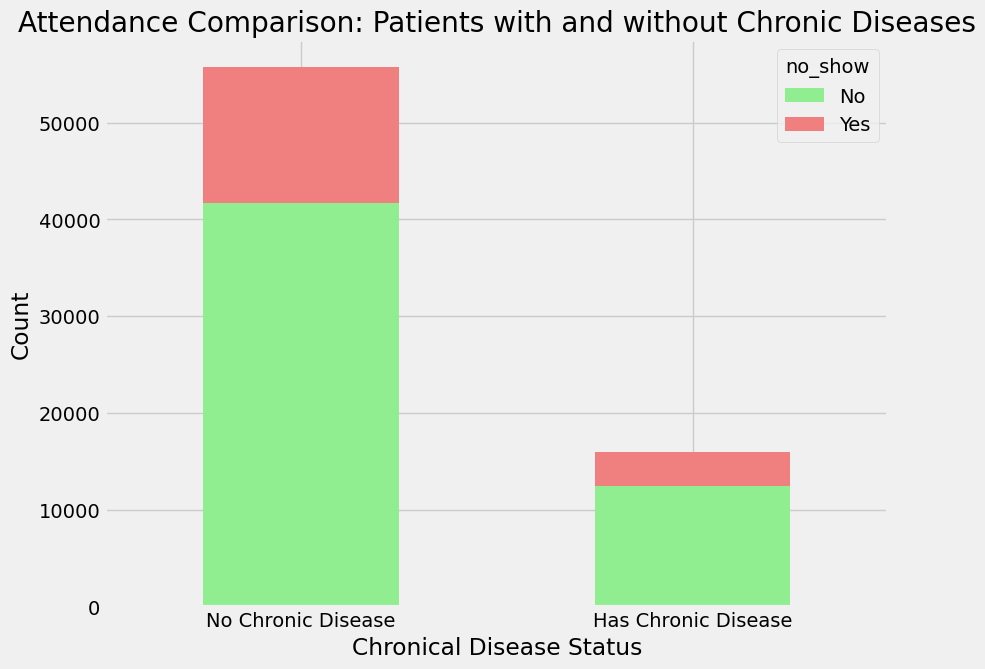

In [23]:
# Create a new column to indicate if a patient has any chronic disease
dfc = df.copy(deep=True)
dfc['has_chronic_disease'] = dfc[['hypertension', 'diabetes', 'alcoholism']].sum(axis=1) > 0

# Calculate the counts of no-shows and shows for patients with and without chronic diseases
comparison = dfc.groupby(['has_chronic_disease', 'no_show']).size().unstack().fillna(0)

# Plot the bar chart
ax = comparison.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], figsize=(9, 7))

# Set labels and title
ax.set_xlabel('Chronical Disease Status')
ax.set_ylabel('Count')
ax.set_title('Attendance Comparison: Patients with and without Chronic Diseases')
ax.set_xticklabels(['No Chronic Disease', 'Has Chronic Disease'], rotation=0)


# Show the plot
plt.show()

In [24]:
# Calculate the counts of no-shows and shows for patients with and without chronic diseases
attendance_comparison = dfc.groupby(['has_chronic_disease', 'no_show']).size().unstack().fillna(0)

# Calculate percentages
attendance_percentages = attendance_comparison.div(attendance_comparison.sum(axis=1), axis=0) * 100

# Prepare data for printing as a table
table_data = [
    ["Chronic Disease", "No-show", "Show"],
    [False, attendance_comparison.loc[False, 'Yes'], attendance_comparison.loc[False, 'No']],
    [True, attendance_comparison.loc[True, 'Yes'], attendance_comparison.loc[True, 'No']],
]

# Print table headers
print("Counts of Attendance for Patients with and without Chronic Diseases:")
# Print table rows
for row in table_data:
    print("{:<17} | {:<7} | {:<5}".format(*row))

print("\nPercentages of Attendance for Patients with and without Chronic Diseases:")
# Print percentages
print(attendance_percentages.round(4))


Counts of Attendance for Patients with and without Chronic Diseases:
Chronic Disease   | No-show | Show 
0                 | 14089   | 41705
1                 | 3574    | 12448

Percentages of Attendance for Patients with and without Chronic Diseases:
no_show                   No      Yes
has_chronic_disease                  
False                74.7482  25.2518
True                 77.6932  22.3068


## Attendance comparison based on SMS received
In analyzing the correlation between SMS reception and appointment attendance, our aim is to discern whether patients who receive SMS reminders exhibit different attendance behavior compared to those who don't. The results reveal a notable difference in attendance rates: 83.30% of patients who did not receive an SMS reminder attended their appointments, while 16.70% did not. The discrepancy show that sending SMS reminders actually had an opposite outcome of the expectation that the reminders would improve attendance. However, we need to investigate how same-day appointments contributes to these findings.

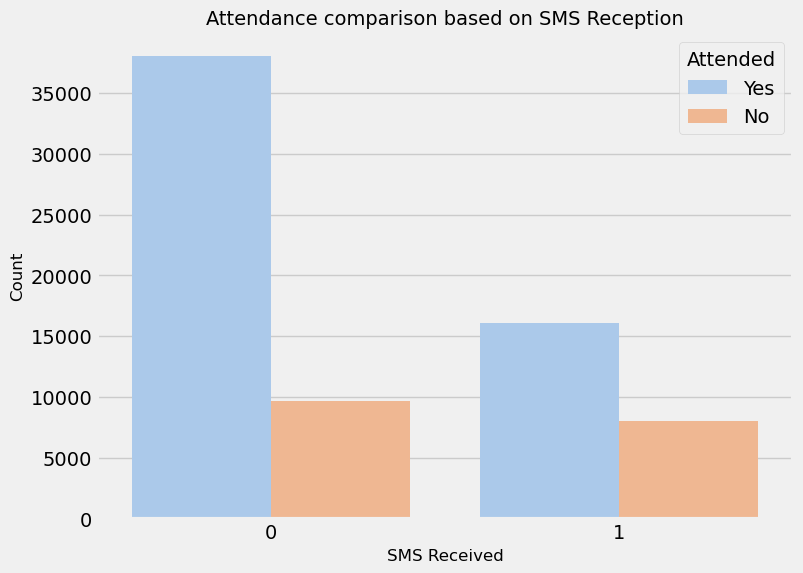

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sms_received', hue='no_show', data=df, palette='pastel')

# Set labels and title
plt.xlabel('SMS Received', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Attendance comparison based on SMS Reception', fontsize=14)

# Show plot
plt.legend(title='Attended', labels=['Yes', 'No'])
plt.show()

In [26]:
# Calculate the percentages of show and noshow instances for each category of SMS reception
perc_sms_show = df.groupby('sms_received')['no_show'].value_counts(normalize=True)[:, 'No'] * 100
perc_sms_noshow = df.groupby('sms_received')['no_show'].value_counts(normalize=True)[:, 'Yes'] * 100

# Prepare data for printing as a table
table_data = []
for sms_received, show_percentage, noshow_percentage in zip(perc_sms_show.index, perc_sms_show.values, perc_sms_noshow.values):
    table_data.append([sms_received, show_percentage, noshow_percentage])

# Print table headers
print("SMS Received | Show Percentage | Noshow Percentage")
# Print table rows
for row in table_data:
    print("{:<12} | {:<15.2f}% | {:<15.2f}%".format(*row))


SMS Received | Show Percentage | Noshow Percentage
0            | 79.76          % | 20.24          %
1            | 66.79          % | 33.21          %


## Same day appointments statistics
Roughly 35% of all appointments recorded were same-day appointments. This distribution is significant enough to influence the results gathered earlier. Therefore, it is necessary to filter out same-day appointments as this will be the real test of the impact of the sms campaign.

In [27]:
is_same_day = (df['scheduled_day'].dt.date == df['appointment_day'].dt.date) & (df['scheduled_day'].dt.month == df['appointment_day'].dt.month)
same_day_appts = df[is_same_day == True]
same_day_appts_count = same_day_appts.value_counts().sum()
# Non-same day appointments
not_same_day_appts = df[is_same_day == False]

print(f"Number of appointments scheduled on the same day: {same_day_appts_count}")
print(f"Percentage of appointments scheduled on the same day: {(same_day_appts_count / df.shape[0]) * 100:.4f}%")

Number of appointments scheduled on the same day: 23658
Percentage of appointments scheduled on the same day: 32.9425%


In [28]:
not_same_day_appts_count = not_same_day_appts.value_counts().sum()
print(f"Number of appointments scheduled on different days: {not_same_day_appts_count}")
not_same_day_appts.shape

Number of appointments scheduled on different days: 48158


(48158, 13)

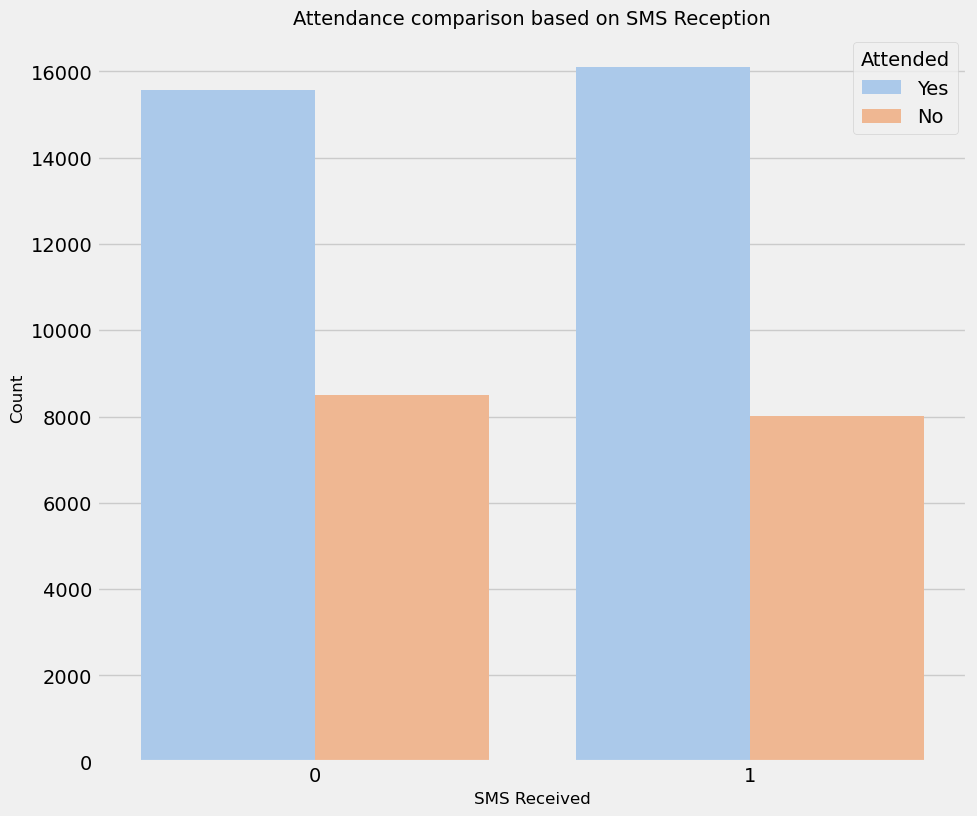

In [29]:
plt.figure(figsize=(10, 9))
sns.countplot(x='sms_received', hue='no_show', data=not_same_day_appts, palette='pastel')

# Set labels and title
plt.xlabel('SMS Received', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Attendance comparison based on SMS Reception', fontsize=14)

# Show plot
plt.legend(title='Attended', labels=['Yes', 'No'])
plt.show()

After filtering out same-day appointments, the new analysis revealed that patients who did not receive an SMS had a show percentage of 70.55% and a no-show percentage of 29.45%. Those who received an SMS showed a slight increase in attendance, with a show percentage of 72.43% and a no-show percentage of 27.57%. This suggests that, for non-same-day appointments, receiving an SMS has a modest positive impact on attendance, improving the show rate by approximately 2% compared to those who did not receive an SMS.

In [30]:
# Calculate the percentages of show and noshow instances for each category of SMS reception for non-same day appointments
perc_sms_show = not_same_day_appts.groupby('sms_received')['no_show'].value_counts(normalize=True)[:, 'No'] * 100
perc_sms_noshow = not_same_day_appts.groupby('sms_received')['no_show'].value_counts(normalize=True)[:, 'Yes'] * 100

# Prepare data for printing as a table
table_data = []
for sms_received, show_percentage, noshow_percentage in zip(perc_sms_show.index, perc_sms_show.values, perc_sms_noshow.values):
    table_data.append([sms_received, show_percentage, noshow_percentage])

# Print table headers
print("SMS Received | Show Percentage | Noshow Percentage")
# Print table rows
for row in table_data:
    print("{:<12} | {:<15.4f}% | {:<15.4f}%".format(*row))


SMS Received | Show Percentage | Noshow Percentage
0            | 64.7118        % | 35.2882        %
1            | 66.7912        % | 33.2088        %


## Attendance comparison by Handicap

Based on the analysis of attendance comparison based on the level of handicap, we observe varying trends. The majority of appointments involve patients with no reported handicap, comprising approximately 97.97% of the dataset. Among these appointments, the no-show rate is 20.24%, indicating a moderate but notable proportion of missed appointments. Interestingly, appointments involving patients with a reported handicap level of 1 or 2 exhibit slightly lower no-show rates compared to those with no reported handicap, suggesting a potential correlation between a mild level of handicap and increased appointment attendance. However, caution is warranted in interpreting these findings due to the relatively small sample sizes of patients with higher levels of handicap (levels 3 and 4), which may not be representative. Further investigation with larger datasets or stratified analyses by handicap severity may provide deeper insights into the relationship between handicap level and appointment attendance.

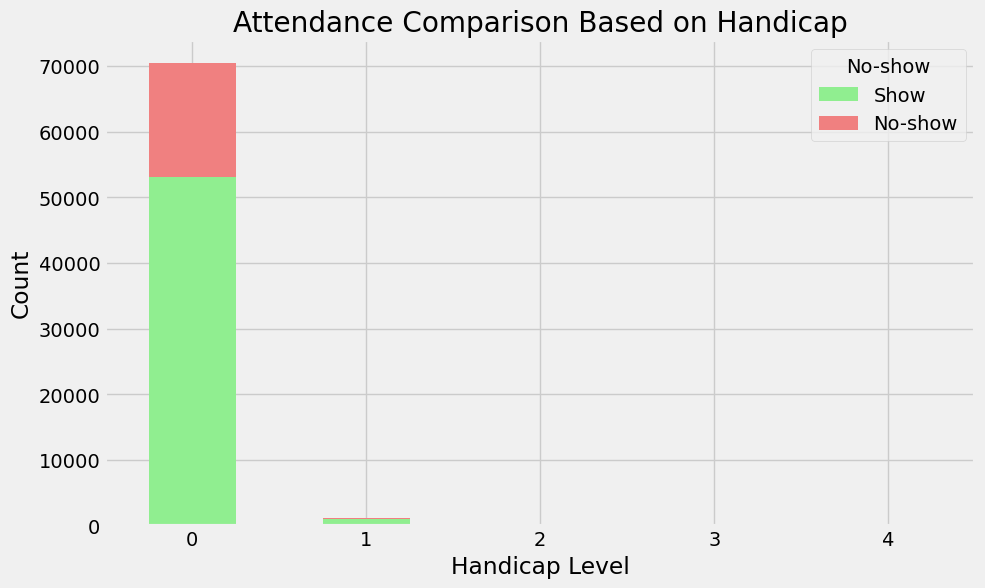

In [31]:
# Calculate the counts for show and no-show for each handicap level
handicap_attendance_counts = df.groupby(['handicap', 'no_show']).size().unstack().fillna(0)

# Plot the bar chart
handicap_attendance_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'lightcoral'])

# Add labels and title
plt.xlabel('Handicap Level')
plt.ylabel('Count')
plt.title('Attendance Comparison Based on Handicap')
plt.legend(title='No-show', loc='upper right', labels=['Show', 'No-show'])
plt.xticks(rotation=0)

plt.show()

In [32]:
# Calculate the total count per handicap level
handicap_total_counts = df.groupby('handicap').size()


handicap_attendance_counts = df.groupby(['handicap', 'no_show']).size().unstack().fillna(0)

handicap_attendance_percentages = handicap_attendance_counts.div(handicap_total_counts, axis=0) * 100

handicap_summary = pd.DataFrame({
    'Handicap Level': handicap_total_counts.index,
    'Total Count': handicap_total_counts.values,
    'Show Count': handicap_attendance_counts['No'].values,
    'Noshow Count': handicap_attendance_counts['Yes'].values,
    'Show Percentage': handicap_attendance_percentages['No'].values,
    'Noshow Percentage': handicap_attendance_percentages['Yes'].values
})

# Print the summary table
print(handicap_summary.to_string(index=False))


 Handicap Level  Total Count  Show Count  Noshow Count  Show Percentage  Noshow Percentage
              0        70511       53126         17385        75.344273          24.655727
              1         1178         931           247        79.032258          20.967742
              2          116          89            27        76.724138          23.275862
              3            8           5             3        62.500000          37.500000
              4            3           2             1        66.666667          33.333333


## Attendance Comparison based on Scholarship status

We observe that the majority of patients without scholarship status attended their appointments, with an attendance rate of 80.19%. Conversely, patients with scholarship status had a slightly lower attendance rate of 76.26%.

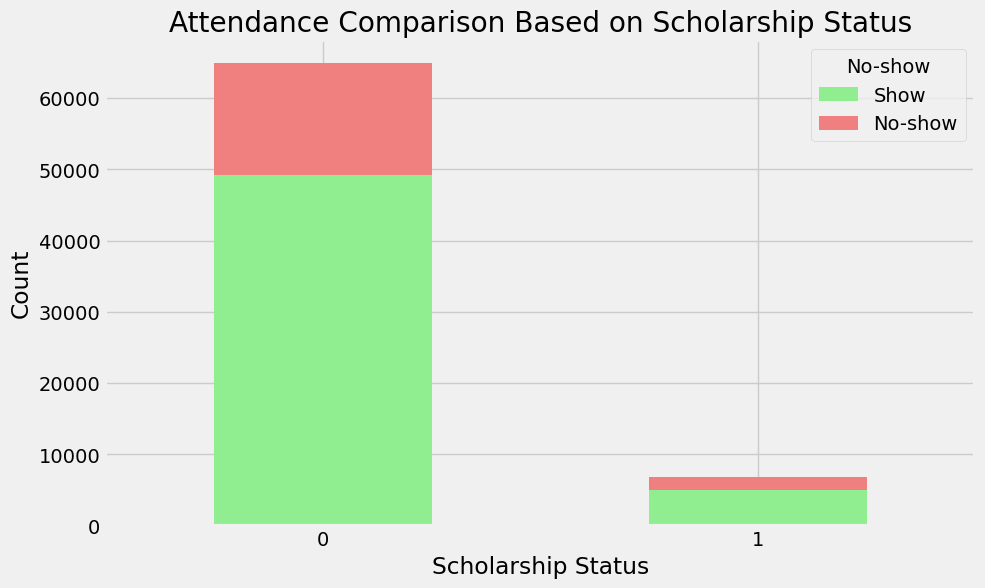

no_show,No,Yes
scholarship,,
0,49207,15748
1,4946,1915


In [33]:
# Calculate the counts for show and no-show for each scholarship status
scholarship_attendance_counts = df.groupby(['scholarship', 'no_show']).size().unstack()

# Plot the bar chart
scholarship_attendance_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'lightcoral'])

# Add labels and title
plt.xlabel('Scholarship Status')
plt.ylabel('Count')
plt.title('Attendance Comparison Based on Scholarship Status')
plt.legend(title='No-show', loc='upper right', labels=['Show', 'No-show'])
plt.xticks(rotation=0)

plt.show()
# #does neighbourhood affect the attendance?
# plt.figure(figsize=(20,13))
# df['scholarship'][show].value_counts().plot(kind='bar', color = 'blue', label = 'show')
# df['scholarship'][no_show].value_counts().plot(kind='bar', color = 'red', label = 'noShow')
# plt.legend()
# plt.title('comparison according to Neighbourhood')
# plt.xlabel('Neighbourhood')
# plt.ylabel('Patient No.')

scholarship_attendance_counts.head()

In [34]:
print(df.groupby('scholarship').size().sum())
df.groupby('scholarship')

71816


In [35]:
# Calculate the total count per scholarship status
scholarship_total_counts = df.groupby('scholarship').size()
scholarship_attendance_perc = scholarship_attendance_counts.div(scholarship_total_counts, axis=0) * 100

scholarship_summary = pd.DataFrame({
    'Scholarship Status': scholarship_total_counts.index,
    'Total Count': scholarship_total_counts.values,
    'Show Count': scholarship_attendance_counts['No'].values,
    'Noshow Count': scholarship_attendance_counts['Yes'].values,
    'Show Percentage': scholarship_attendance_perc['No'].values,
    'Noshow Percentage': scholarship_attendance_perc['Yes'].values
})

print(scholarship_summary.to_string(index=False))

 Scholarship Status  Total Count  Show Count  Noshow Count  Show Percentage  Noshow Percentage
                  0        64955       49207         15748        75.755523          24.244477
                  1         6861        4946          1915        72.088617          27.911383


## Attendance comparison based on Neighborhood

The variability in the percentages of attendance per neighbourhood shows neighbourhood has a strong effect on attendance, perhaps more than other features explored in this analysis. This may be the factor that contributes most to attendance and this might need to be investigated further, although that is beyond the scope of the data analysis.

Text(0, 0.5, 'Patient No.')

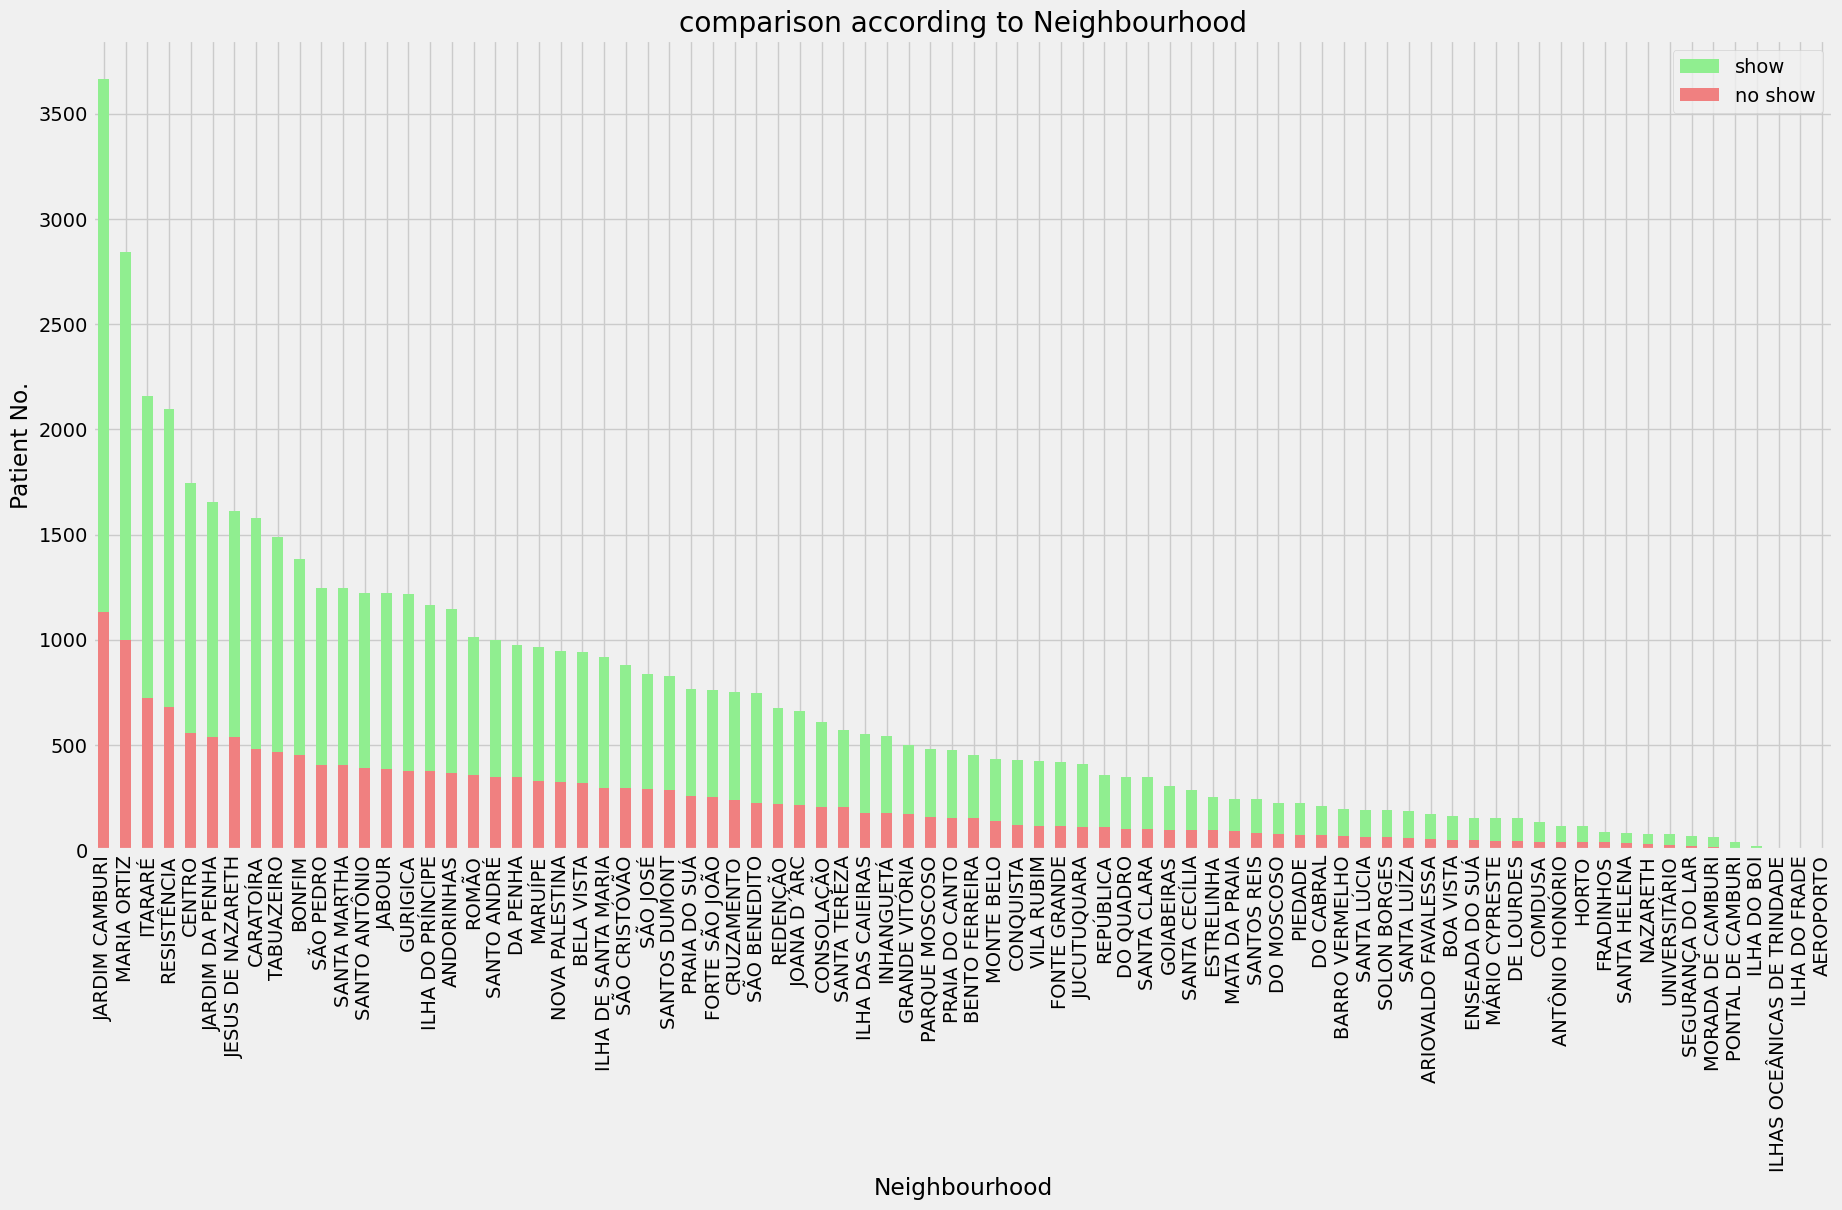

In [36]:
#does neighbourhood affect the attendance?
plt.figure(figsize=(20,10))
df['neighbourhood'][show].value_counts().plot(kind='bar', color = 'lightgreen', label = 'show')
df['neighbourhood'][no_show].value_counts().plot(kind='bar', color = 'lightcoral', label = 'no show')
plt.legend()
plt.title('comparison according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient No.')

In [37]:
# Group by neighborhood and no_show, calculate counts
neighborhood_counts = df.groupby(['neighbourhood', 'no_show']).size().unstack().fillna(0)

# Calculate total count per neighborhood
total_counts = neighborhood_counts.sum(axis=1)

# Sort neighborhoods by total count in descending order
sorted_neighborhood_counts = neighborhood_counts.loc[total_counts.sort_values(ascending=False).index]

# Calculate percentages
neighborhood_percentages = (sorted_neighborhood_counts.div(sorted_neighborhood_counts.sum(axis=1), axis=0) * 100).round(2)

# Prepare the data for printing
data = {
    'Neighborhood': sorted_neighborhood_counts.index,
    'Total Count': sorted_neighborhood_counts.sum(axis=1),
    'Show Count': sorted_neighborhood_counts['No'],
    'Noshow Count': sorted_neighborhood_counts['Yes'],
    'Show Percentage': neighborhood_percentages['No'],
    'Noshow Percentage': neighborhood_percentages['Yes']
}

# Create DataFrame
result_df = pd.DataFrame(data)

# Print the table
print(result_df.head(15).to_string(index=False))


     Neighborhood  Total Count  Show Count  Noshow Count  Show Percentage  Noshow Percentage
   JARDIM CAMBURI       4800.0      3666.0        1134.0            76.38              23.62
      MARIA ORTIZ       3845.0      2845.0        1000.0            73.99              26.01
      RESISTÊNCIA       2780.0      2098.0         682.0            75.47              24.53
  JARDIM DA PENHA       2696.0      2160.0         536.0            80.12              19.88
          ITARARÉ       2470.0      1745.0         725.0            70.65              29.35
           CENTRO       2165.0      1610.0         555.0            74.36              25.64
       TABUAZEIRO       2121.0      1656.0         465.0            78.08              21.92
     SANTA MARTHA       1981.0      1577.0         404.0            79.61              20.39
    SANTO ANTÔNIO       1879.0      1488.0         391.0            79.19              20.81
           BONFIM       1834.0      1383.0         451.0            75

## Class Imbalance Investigation
There is a significant imbalance between the classes as over 88k patients attended their appointments versus over 22k missing their appointments. A similar imbalance still appears even after filtering out same-day appointments as it was already known that 35% of the appointments were same-day appointments which majorly were shows (No in no_show class). This occurence must be considered during data modeling. This also means the metric for model quality may not be accuracy and might be other metrics like F1 Score and ROC AUC. Another possible technique that can be implemented could be Random Undersampling.

In [38]:
df['no_show'].value_counts()

no_show
No     54153
Yes    17663
Name: count, dtype: int64

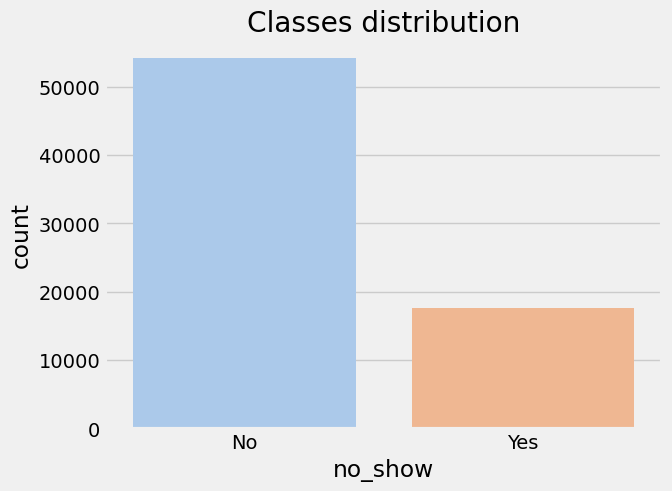

In [39]:
# Investigate the class imbalance in the dataset (no-shows vs shows) and plot the distribution on one bar chart

sns.countplot(x='no_show', data=df, palette='pastel')
plt.title("Classes distribution")
plt.show()



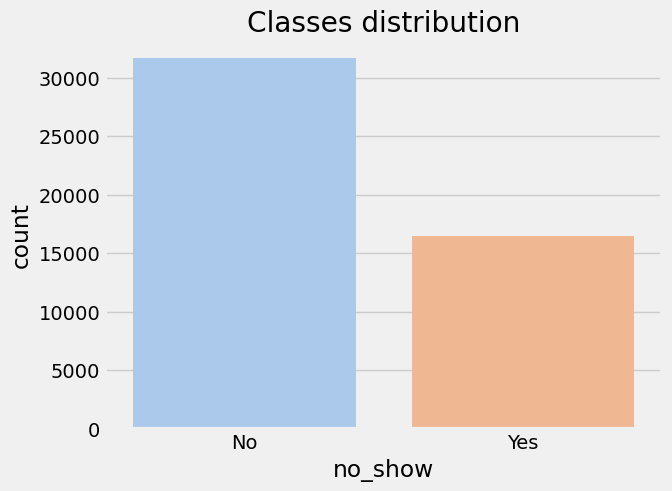

In [40]:
# Check class imbalance if same day appointments are removed  and plot the distribution on one bar chart
sns.countplot(x='no_show', data=not_same_day_appts, palette='pastel')
plt.title("Classes distribution")
plt.show()

In [41]:

# Ratio of shows to no-shows
no_show_ratio = df['no_show'].value_counts(normalize=True)['Yes'] / df['no_show'].value_counts(normalize=True)['No']
no_show_ratio = round(no_show_ratio, 2)
print(f'Ratio of shows to no-shows: {no_show_ratio.as_integer_ratio()[1]}:{no_show_ratio.as_integer_ratio()[0]}')

Ratio of shows to no-shows: 18014398509481984:5944751508129055


# Data Modelling
As we proceed with the data modeling stage, two data modeling techniques were chosen for predicting if a patient will miss their appointments or not. The model techniques used are:
1. Logistic Regression Classifier
2. Neural Network Classifier

This is the order of steps that will be followed:
1. Perform feature engineering.
    - Convert categorical features to numerical. This can be done via one hot encoding.
    - Create new features as needed.
    - Perform feature selection.
3. Split dataset into training, validation and testing sets.
4. Design and train the models on the training set and hypertune with validation set.
5. Evaluate the model's performance via accuracy, F1, confusion matrix and ROC AUC results from testing set.

## 1. Convert categorical features to numerical

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
dfm = df.copy(deep=True)
dfm.shape

(71816, 13)

In [44]:
# Drop rows where the values of the handicap column are greater than 1
dfm.drop(dfm[dfm['handicap'] > 1].index, inplace=True)
dfm.reset_index(drop=True, inplace=True)
dfm.shape

(71689, 13)

In [45]:
# Create Male and Female numerical columns from gender column
dfm['is_male'] = dfm['gender'].map({'M': 1, 'F': 0})

# Convert the target variable column
dfm['no_show'] = dfm['no_show'].map({'Yes': 1, 'No': 0})

# Drop the gender column
dfm.drop(columns=['gender'], inplace=True, axis=1)
print(dfm.tail())
dfm.shape


         patient_id             scheduled_day           appointment_day  age neighbourhood  scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  no_show  is_male
71684  7.263315e+13 2016-04-27 15:15:06+00:00 2016-06-07 00:00:00+00:00   50   MARIA ORTIZ            0             0         0           0         0             1        0        0
71685  9.969977e+14 2016-05-03 07:51:47+00:00 2016-06-07 00:00:00+00:00   42   MARIA ORTIZ            0             0         0           0         0             1        0        0
71686  3.635534e+13 2016-05-03 08:23:40+00:00 2016-06-07 00:00:00+00:00   53   MARIA ORTIZ            0             0         0           0         0             1        0        0
71687  2.572134e+12 2016-05-03 09:15:35+00:00 2016-06-07 00:00:00+00:00   56   MARIA ORTIZ            0             0         0           0         0             1        0        0
71688  1.557663e+13 2016-04-27 16:03:52+00:00 2016-06-07 00:00:00+00:00   21   MARIA ORTIZ

(71689, 13)

In [46]:
dfm.head()

,patient_id,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,is_male
0,2.987250e+13,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1
2,4.262962e+12,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


## Model Design Thought Process

## Knowledge Summary
This is what we know from the dataset.
1. The target variable is significantly imbalanced with more patients attending vs no shows.
2. The dataset has a mix of categorical and numerical features. But we have converted the categorical features to numerical.
3. The dataset has no missing or duplicate values.
4. We have used frequency encoding for the neighbourhood column which is a high cardinality column.
5. We have normalized the age column.
6. We have evaluated the correlations between the features and the target variable using the Chi-Square test and the Pearson correlation coefficient.
7. From the correlation tests, we can see the top 5 features that are most related to the target variable are: sms_received, hypertension, scholarship, neighbourhood_encoded, and age_scaled.

## Next Steps
1. We will split the dataset into training, validation, and test sets. We will use 70% of the data for training, 15% for validation, and 15% for testing
2. We will need to handle the class imbalance in the training set by using Random undersampling.
3. We will use a Random Forest Classifier to build the model.
4. We will evaluate the model using the validation set.
5. We will fine-tune the model using GridSearchCV.
6. We will evaluate the model using the test set.

### We have neighbourhood column with high cardinality. Using one-hot encoding will increase the number of columns significantly. Therefore, we can use frequency encoding to encode the neighbourhood column.

scholarship           0
hypertension          0
sms_received          0
neighbourhood_freq    0
dtype: int64
scholarship           0
hypertension          0
sms_received          0
neighbourhood_freq    0
dtype: int64
scholarship           0
hypertension          0
sms_received          0
neighbourhood_freq    0
dtype: int64
Validation Set

Accuracy: 0.63
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                5543                2492
Actual Positive                1483                1235
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      8035
           1       0.33      0.45      0.38      2718

    accuracy                           0.63     10753
   macro avg       0.56      0.57      0.56     10753
weighted avg       0.67      0.63      0.65     10753

ROC AUC Score: 0.58
Test Set
Accuracy: 0.64
Confusion Matrix:
                 Predicted Negative  Predict

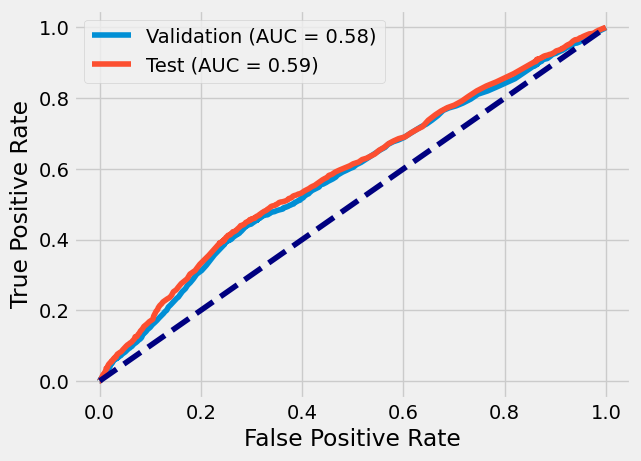

(0.6303357202641123,
 array([[5543, 2492],
        [1483, 1235]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.79      0.69      0.74      8035\n           1       0.33      0.45      0.38      2718\n\n    accuracy                           0.63     10753\n   macro avg       0.56      0.57      0.56     10753\nweighted avg       0.67      0.63      0.65     10753\n',
 0.6415287334945137,
 array([[5695, 2415],
        [1440, 1204]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.70      0.75      8110\n           1       0.33      0.46      0.38      2644\n\n    accuracy                           0.64     10754\n   macro avg       0.57      0.58      0.57     10754\nweighted avg       0.68      0.64      0.66     10754\n')

In [47]:

from sklearn.linear_model import LogisticRegression
from utility.utils import run_pipeline
log_reg_model = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
run_pipeline(df=dfm, lvl1_test_size=0.3, lvl2_test_size=0.5, random_state=42, model=log_reg_model, target_col_label='no_show', selected_cols=['age', 'scholarship', 'hypertension', 'sms_received', 'neighbourhood'], pick_results=['val_accuracy','val_confusion_matrix','val_classification_report','test_accuracy','test_confusion_matrix','test_classification_report'])

In [48]:
selected_columns = ['age', 'neighbourhood', 'scholarship', 'hypertension', 'sms_received']
# Initial stratified split into training and temp set (70% training, 30% temp)

train_set, temp_set = train_test_split(dfm, test_size=0.3, random_state=42)

# Stratified split of the temp set into validation and test sets (each 15% of the total data)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Function to print class imbalance ratios
def print_class_counts_and_ratios(_df, set_name):
    class_counts = _df['no_show'].value_counts()
    class_ratios = class_counts / len(df)
    print(f"{set_name} set class distribution:")
    print(f"Counts:\n{class_counts}")
    print(f"Ratios:\n{class_ratios}")
    print()

# Print the class imbalance ratios
print_class_counts_and_ratios(train_set, "Training")
print_class_counts_and_ratios(val_set, "Validation")
print_class_counts_and_ratios(test_set, "Testing")

NameError: name 'train_test_split' is not defined

In [ ]:
# Extract the no_show column and remove it from the feature sets
from pandas import DataFrame


X_train:DataFrame = train_set[selected_columns]
y_train = train_set['no_show']
X_val = val_set[selected_columns]
y_val = val_set['no_show']
X_test = test_set[selected_columns]
y_test = test_set['no_show']

# Perform random undersampling on the training set
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Print the class imbalance ratio for the resampled training set
print_class_counts_and_ratios(pd.DataFrame(y_train_res, columns=['no_show']), "Resampled Training")

# Print the final shapes of the sets
print(f"X_train shape: {X_train_res.shape}")
print(f"y_train shape: {y_train_res.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(X_train.head())

In [ ]:
X_train = pd.DataFrame(X_train_res)
y_train = pd.DataFrame(y_train_res)

In [ ]:
# First check if there are any labels in the neighbourhood column that have the same count.
track_count = 0
for count in X_train['neighbourhood'].value_counts().value_counts():
    if count > 1:
        track_count += 1
    else:
        continue

if track_count > 0:
    print(f'{'-'*10}There are labels with the same count. Valuable information may be lost.{'-'*10}')

In [ ]:
freq = X_train['neighbourhood'].value_counts(normalize=True)

# Create a dictionary for neighbourhood frequencies in the training set
train_set_neighbourhood_freq_dict = freq.to_dict()

# Encode the neighbourhood column and drop the original column of neighbourhood from the datasets
for df in [X_train, X_val, X_test]:
    df["neighbourhood_encoded"] = df['neighbourhood'].map(train_set_neighbourhood_freq_dict).fillna(0)
    df.drop(columns=['neighbourhood'], inplace=True)


In [ ]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train['age_scaled'] = min_max_scaler.fit_transform(X_train[['age']])
X_train.drop(columns=['age'], inplace=True)

for df in [X_val, X_test]:
    df['age_scaled'] = min_max_scaler.transform(df[['age']])
    df.drop(columns=['age'], inplace=True)

## Feature Selection

Before modeling, we need to select what features may contribute the most information gain to the model, i.e correlates with the target variables. From the dataset, most of the features are binary, including the target variables. For categorical input features with categorical output/target, a well-known method for determining the correlation is called Chi-Square Test. However, we have converted the neighbourhood and age features to non-binary numerical features. For these columns, we may need to apply a different correlation discovery technique called Pearson Correlation Coefficient.

## Chi Square 
I will select the best 3 features with the highest importance from the results of conducting the Chi Square. This works by choosing the three features with the highest chi values and lowest p values.

# Pearson Correlation Coefficient
As there are only 2 input features,adding to the previously selected 3 features from the Chi-Square test gives 5 features which is not too much for the model. So after visualization, we can add both features as inputs for the models and evaluate the performance.

In [ ]:
dfm.columns

In [ ]:
X = dfm.drop(columns=['no_show', 'patient_id', 'scheduled_day', 'appointment_day', 'neighbourhood','age'], axis=1)
y = dfm['no_show']

In [ ]:
chi_scores = chi2(X, y)

In [ ]:
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)


In [ ]:
# Higher the p-value, the more the feature is independent of the target variable

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)


In [ ]:
# Print Chi and P-values for each feature
print("Chi and P-values for each feature:")
# Print the table
print(pd.concat([chi_values, p_values], axis=1, keys=['Chi', 'P-value']))

In [ ]:
# Higher the chi-squared value, the more the feature is related to the target variable
# Plot the chi-squared values using a bar chart. Give a chart title of 'Chi value importance for each feature'
chi_values.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Chi value importance for each feature')

In [ ]:
# Plot the p-values using a bar chart. Give a chart title of 'P-value importance for each feature'
p_values.plot(kind='bar', figsize=(12, 6), color='lightcoral')
plt.title('P-value importance for each feature')

In [ ]:
# sns.set_theme(style="white")
# non_binary_cols = ['neighbourhood_encoded', 'age_scaled', 'no_show']
# corr = dfm[non_binary_cols].corr()  # Create the pearson correlation metrix object

# fig, ax = plt.subplots() # create the figure

# sns.heatmap(corr, annot=True, cmap='Greens', annot_kws={'rotation':45}) # Draw the heatmap

# plt.title("Correlation Matrix")
# plt.show()

In [ ]:
# Implement Logistic Regression model
from matplotlib.pylab import solve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
LogReg = LogisticRegression(C=0.0001, random_state=42, max_iter=2500, tol=1e-05, solver='liblinear')

# Fit the model on the training data
LogReg.fit(X_train, y_train)

In [ ]:
#Print the model coefficients per feature in a table.
print("Model Coefficients:")
# Print the table
print(pd.DataFrame(LogReg.coef_, columns=X_train.columns).T)

In [ ]:
print("Validation set Shape:", X_val.shape)
print("Validation No_show class distribution:", y_val.value_counts())

# Predict the target variable on the validation set
y_pred = LogReg.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)

In [ ]:
# Show results of the model on the validation set
print("Validation set Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Predict probabilities on the validation set
y_val_prob = LogReg.predict_proba(X_val)[:, 1]

# Step 2: Apply the threshold to get the predicted class labels
threshold = 0.6
y_val_pred_threshold = (y_val_prob >= threshold).astype(int)

# Step 3: Evaluate the model using the new threshold
# Print the classification report
print("Classification Report at Threshold 0.53:")
print(classification_report(y_val, y_val_pred_threshold))

# Print the confusion matrix
print("Confusion Matrix at Threshold 0.53:")
print(confusion_matrix(y_val, y_val_pred_threshold))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_val_prob)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Step 4: Plot the ROC AUC curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Predict the target variable on the test set
y_pred_test = LogReg.predict(X_test)

# Calculate the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred_test)

# Show results of the model on the test set
print("Test set Evaluation:")
print("Accuracy:", accuracy_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


In [ ]:
param_grid = [    
    {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'tol': [1e-5, 1e-4, 1e-3, 1e-2],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
log_reg = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_val,y_val)

In [ ]:
best_clf.best_estimator_

In [ ]:
print (f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')